# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [4]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [5]:
### Comment this out for now :)
# df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')
## For now, good will be 1 and bad will be 2

In [6]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


<AxesSubplot:xlabel='Risk', ylabel='count'>

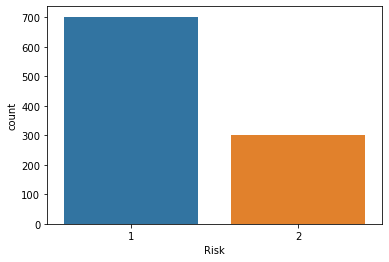

In [7]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [8]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [9]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [10]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,1
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,2
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,1
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,1
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,2


In [11]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

Show all your work below

## First we'll look for any null data or outliers 

In [12]:
df.describe()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.00000
mean,20.933200,3270.800598,2.971087,2.843470,35.764706,1.407777,1.154536,1.30010
std,12.092315,2821.223379,1.119667,1.104529,13.564236,0.577540,0.361642,0.45853
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.00000
25%,12.000000,1365.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.00000
50%,18.000000,2319.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.00000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.00000
max,72.000000,18424.000000,4.000000,4.000000,270.000000,4.000000,2.000000,2.00000


In [13]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History               True
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                          True
Liable                      False
Risk                        False
dtype: bool

In [14]:
df.Job.unique()

array(['skilled employee', 'unskilled/resident',
       'management/highly qualified employee', 'unemployed/non-resident',
       nan], dtype=object)

In [15]:
df['Credit History'].unique()

array(['default', 'paid back', 'delay', nan], dtype=object)

In [16]:
df.isna().sum
## Insiginificant number of null rows

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Checking Account  Duration  Credit History  Purpose  Credit Amount  \
0                False     False           False    False          False   
1                False     False           False    False          False   
2                False     False           False    False          False   
3                False     False           False    False          False   
4                False     False           False    False          False   
...                ...       ...             ...      ...            ...   
998              False     False           False    False          False   
999              False     False           False    False          False   
1000             False     False           False    False          False   
1001             False     False           False    False          False   
1002             False     False           False    False          False   

      Saving Account  Emp

In [17]:
## Drop null rows
df = df.dropna()

In [18]:
## Now we have a non null categorical variable
df.Job.unique()

array(['skilled employee', 'unskilled/resident',
       'management/highly qualified employee', 'unemployed/non-resident'],
      dtype=object)

In [19]:
## Just making sure everything is non null
df.isnull().any()

Checking Account            False
Duration                    False
Credit History              False
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                         False
Liable                      False
Risk                        False
dtype: bool

### Let's look for outliers in numerical fields using boxplots
- I've only kept boxplots where I found outliers to not clutter the project

<AxesSubplot:xlabel='Age'>

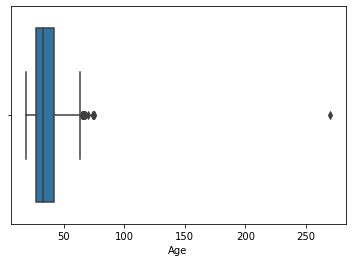

In [20]:
## Here we see an outlier greater than 250
plt.figure()
sns.boxplot(x=df['Age'])

<AxesSubplot:xlabel='Duration'>

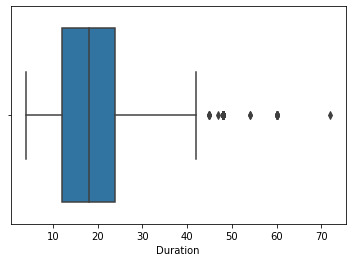

In [21]:
## Here we see an outlier greater than 70
plt.figure()
sns.boxplot(x=df['Duration'])

<AxesSubplot:xlabel='Credit Amount'>

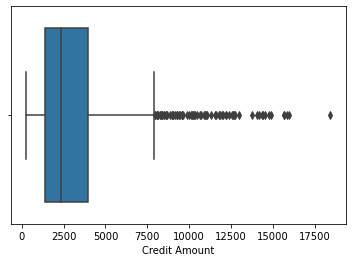

In [22]:
## Here we see an outlier greater than 17500
plt.figure()
sns.boxplot(x=df['Credit Amount'])

<AxesSubplot:>

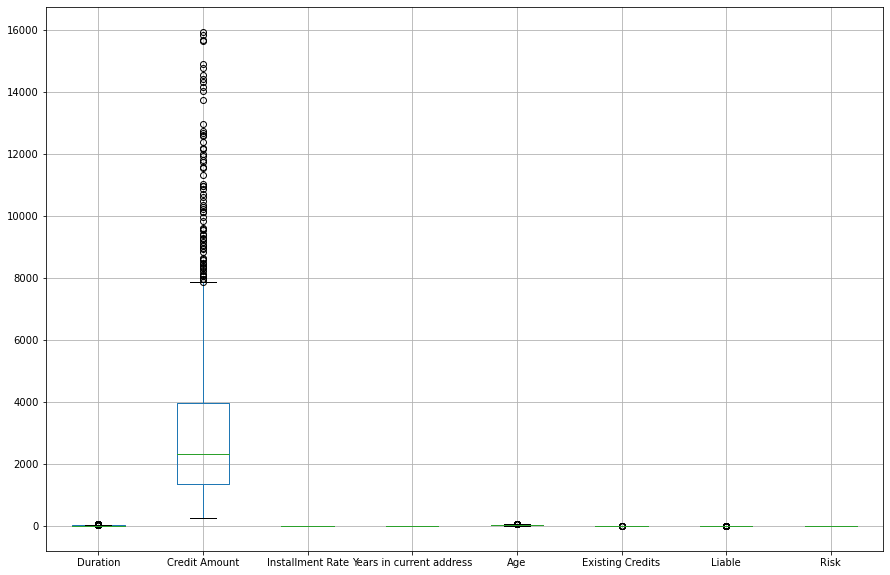

In [23]:
## Remove Age greater than 120 outlier from df
df = df[df['Age'] < 120]
## Remove the Credit Amount outlier greater than 17500 from df
df = df[df['Credit Amount'] < 17500]
## Remove the duration if greater than 60 from df
df = df[df['Duration'] < 70]

df.boxplot(figsize=(15,10))

In [24]:
## We're going to use this lambda function to change the values of risk to 1 for good and 0 for bad
df['Risk'] = df['Risk'].apply(lambda x: 1 if x == 1 else 0)

In [25]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,1
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,0
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,1
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,1
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,0


In [26]:
## Grouping by risk
df.groupby('Risk').mean()
## Here we see that on average, the largest differentiating variables between risk are Duration and Credit amount

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable
Risk,,,,,,,
0,24.624161,3883.956376,3.107383,2.855705,34.003356,1.369128,1.154362
1,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714


In [27]:
## Now to observe the correlation between Risk and other Variables we'll use pairplot to visually
## inspect each variable against every other variable and panda's .corr() function to numerically inspect.
df.corr()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
Duration,1.000000,0.625851,0.083552,0.039528,-0.031505,-0.006783,-0.021301,-0.207890
Credit Amount,0.625851,1.000000,-0.265568,0.034210,0.035789,0.025563,0.020103,-0.147799
Installment Rate,0.083552,-0.265568,1.000000,0.047400,0.056971,0.019856,-0.072492,-0.076765
Years in current address,0.039528,0.034210,0.047400,1.000000,0.265707,0.088639,0.042018,-0.005328
Age,-0.031505,0.035789,0.056971,0.265707,1.000000,0.148474,0.117719,0.089355
Existing Credits,-0.006783,0.025563,0.019856,0.088639,0.148474,1.000000,0.109136,0.043699
Liable,-0.021301,0.020103,-0.072492,0.042018,0.117719,0.109136,1.000000,0.001708
Risk,-0.207890,-0.147799,-0.076765,-0.005328,0.089355,0.043699,0.001708,1.000000


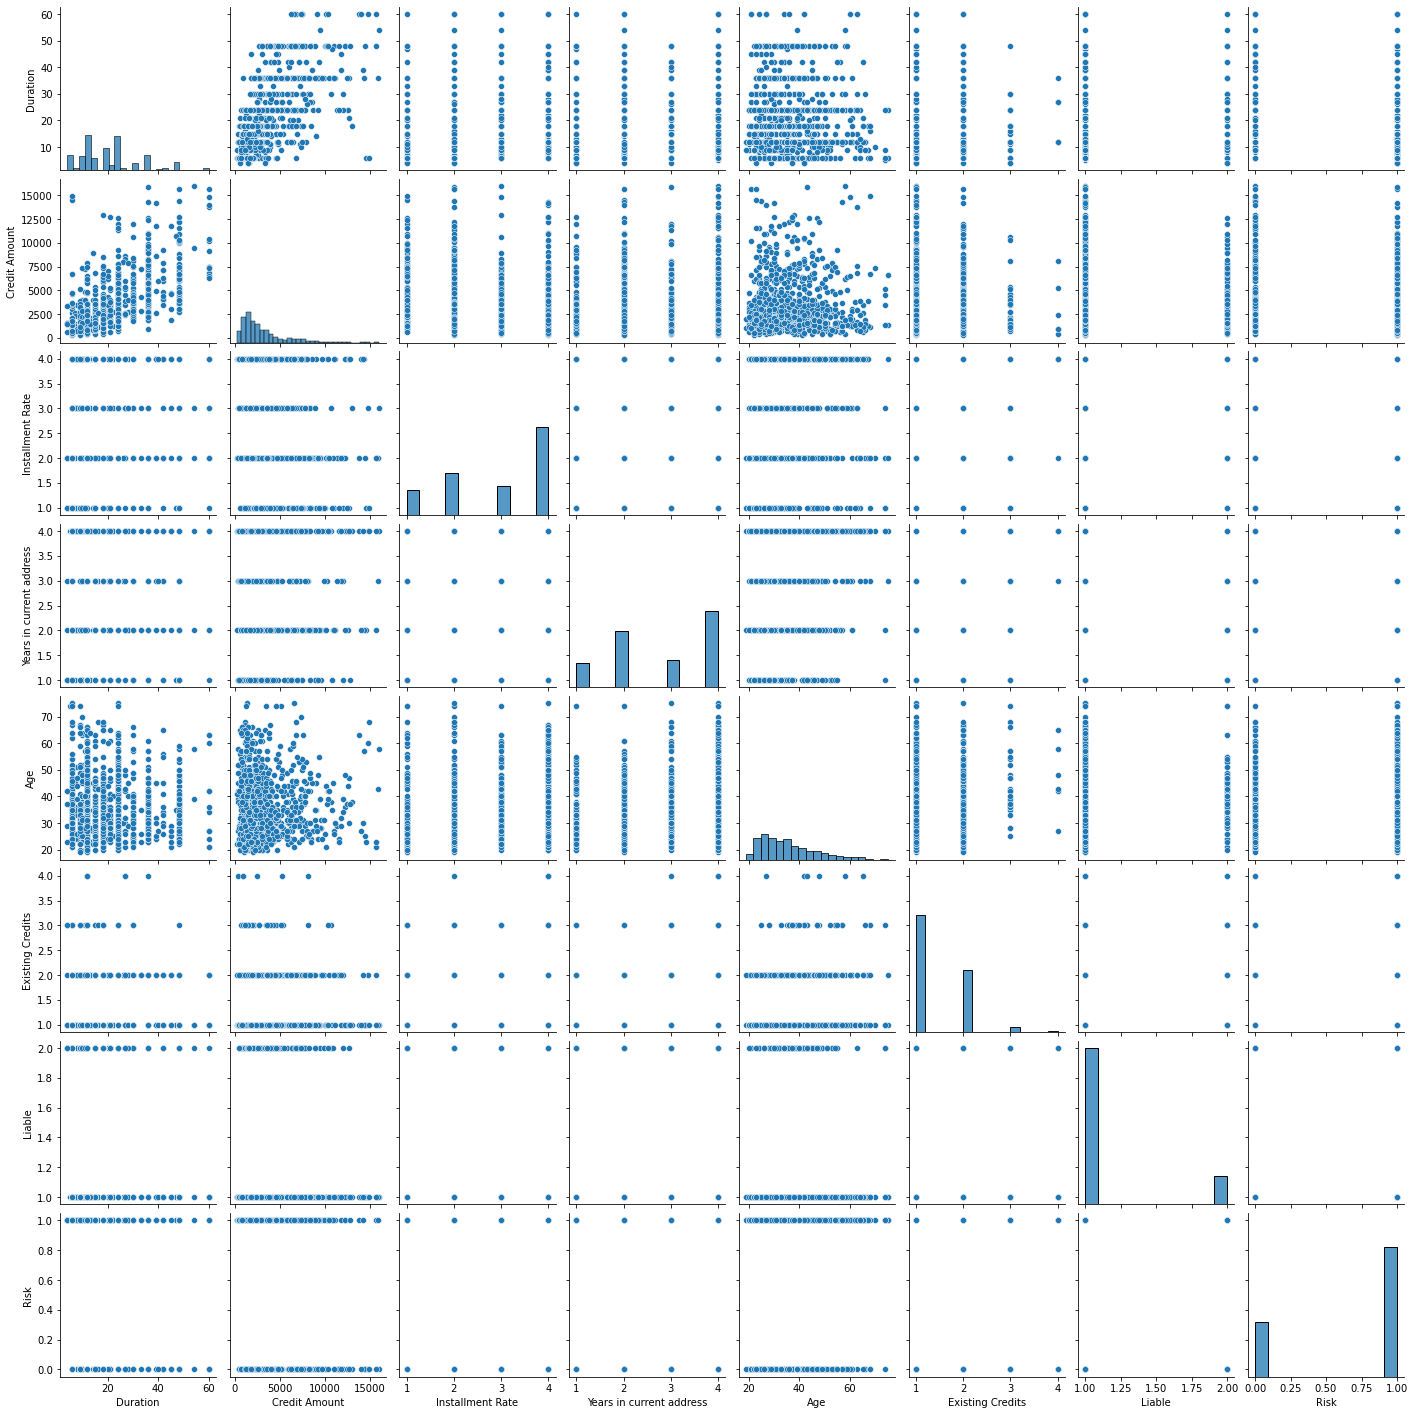

In [28]:
sns.pairplot(data=df, kind='scatter')

#### Both the visual and numerical inspection of correlation suggests that Duration and Credit amount have impactful negative correlations with risk. Other variables have no strong correlation to risk.

# Building a Logistic Regression Model

### Here's what the Logistic Regression Model looks like only using Numarical variables.

In [29]:
## Here we're going to remove categorical variables and only use numarical variables
df_model1 = df[['Duration', 'Credit Amount', 'Installment Rate', 'Years in current address', 'Age', 'Existing Credits', 'Liable']]
## Training variables
X_train, X_test, Y_train, Y_test = train_test_split(df_model1, df['Risk'], test_size=0.2, random_state=0)
## Build the model
model = LogisticRegression()
## Fit the model to the training variables
model.fit(X_train, Y_train)
## Make it predict based on the testing variable
pred = model.predict(X_test)
## Print the model's performance report
print(classification_report(Y_test, pred))
print('Accuracy Score:', accuracy_score(Y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.12      0.19        49
           1       0.77      0.95      0.85       151

    accuracy                           0.75       200
   macro avg       0.62      0.54      0.52       200
weighted avg       0.69      0.75      0.69       200

Accuracy Score: 0.75


### Let's make dummies for the categorical variables and see how it affects the performance of the model
Here we'll build a new dataframe with dummies for the categorical variables

There are 11 categorical variables for us to change:
- Checking account
- Credit History
- Purpose
- Saving Account
- Employment Status
- Personal Status
- Guarantors
- Property
- Installment plans
- Housing
- Job

In [30]:
checking_account_dummies =  pd.get_dummies(df['Checking Account'], drop_first=True)
credit_history_dummies =    pd.get_dummies(df['Credit History'], drop_first=True)
purpose_dummies =           pd.get_dummies(df['Purpose'], drop_first=True)
saving_account_dummies =    pd.get_dummies(df['Saving Account'], drop_first=True)
emp_status_dummies =        pd.get_dummies(df['Employment Status'], drop_first=True)
personal_status_dummies =   pd.get_dummies(df['Personal Status'], drop_first=True)
guarantors_dummies =        pd.get_dummies(df['Guarantors'], drop_first=True)
property_dummies =          pd.get_dummies(df['Property'], drop_first=True)
installment_plans_dummies = pd.get_dummies(df['Installment plans'], drop_first=True)
housing_dummies =           pd.get_dummies(df['Housing'], drop_first=True)
jobs_dummies =              pd.get_dummies(df['Job'], drop_first=True)

In [31]:
## Let's just make sure all the dummies were created properly
print(checking_account_dummies)
print(credit_history_dummies)
print(purpose_dummies)
print(saving_account_dummies)
print(emp_status_dummies)
print(personal_status_dummies)
print(guarantors_dummies)
print(property_dummies)
print(installment_plans_dummies)
print(housing_dummies)
print(jobs_dummies)

      little  moderate  rich
0          1         0     0
1          0         1     0
2          0         0     0
3          1         0     0
4          1         0     0
...      ...       ...   ...
997        0         0     0
998        1         0     0
999        0         0     0
1000       1         0     0
1001       0         1     0

[998 rows x 3 columns]
      delay  paid back
0         0          0
1         0          1
2         0          0
3         0          1
4         1          0
...     ...        ...
997       0          1
998       0          1
999       0          1
1000      0          1
1001      0          0

[998 rows x 2 columns]
      car  domestic appliances  education  furniture/equipment  others  \
0       0                    0          0                    0       0   
1       0                    0          0                    0       0   
2       0                    0          1                    0       0   
3       0                    0  

In [32]:
## Everything looks good so now we'll rebuild the df by concatting the dummies
df_with_dummies = pd.concat([df_model1, checking_account_dummies, credit_history_dummies, purpose_dummies, 
                       saving_account_dummies, emp_status_dummies, personal_status_dummies, guarantors_dummies, 
                       property_dummies, installment_plans_dummies, housing_dummies, jobs_dummies], axis=1)
df_with_dummies.shape

(998, 43)

In [33]:
df_with_dummies.head()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,little,moderate,rich,...,life insurance,no property,real estate,none,stores,own,rent,skilled employee,unemployed/non-resident,unskilled/resident
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [34]:
## Training variables with new model
X_train, X_test, Y_train, Y_test = train_test_split(df_with_dummies, df['Risk'], test_size = 0.2, random_state = 0)
## Build new model
model = LogisticRegression()
## Fit the model with training data
model.fit(X_train, Y_train)
pred = model.predict(X_test)
## Print the model performance report
print(classification_report(Y_test, pred))
print('Accuracy Score:', accuracy_score(Y_test, pred))

              precision    recall  f1-score   support

           0       0.44      0.37      0.40        49
           1       0.81      0.85      0.83       151

    accuracy                           0.73       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.72      0.73      0.72       200

Accuracy Score: 0.73


### Now we're going to try a logistic regression model without Credit History specifically

In [35]:
## We need to modify our dataframe to not include the categorical values of Credit History's dummies
df_without_credit_history = pd.concat([df_model1, checking_account_dummies, purpose_dummies, 
                       saving_account_dummies, emp_status_dummies, personal_status_dummies, guarantors_dummies, 
                       property_dummies, installment_plans_dummies, housing_dummies, jobs_dummies], axis=1)
df_without_credit_history.shape

(998, 41)

In [36]:
## Training variables with new model
X_train, X_test, Y_train, Y_test = train_test_split(df_without_credit_history, df['Risk'], test_size = 0.2, random_state = 0)
## Build new model
model = LogisticRegression()
## Fit the model with training data
model.fit(X_train, Y_train)
pred = model.predict(X_test)
## Print the model performance report
print(classification_report(Y_test, pred))
print('Accuracy Score:', accuracy_score(Y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.33      0.38        49
           1       0.80      0.87      0.84       151

    accuracy                           0.74       200
   macro avg       0.63      0.60      0.61       200
weighted avg       0.72      0.74      0.72       200

Accuracy Score: 0.74


In [37]:
## Accross multiple trials we'll need to keep track of how the model is doing
accuracy = []
## We're going to need a random number for this so let's introduce random
import random
## Since we're randomizing the Model let's build 10 of them to see how they perform on average
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df_without_credit_history, df['Risk'], test_size = 0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    print('Trial ' + str(i+1))
    print(classification_report(Y_test, pred))
    print('Accuracy Score:', accuracy_score(Y_test, pred))

Trial 1
              precision    recall  f1-score   support

           0       0.26      0.15      0.19        60
           1       0.69      0.81      0.75       140

    accuracy                           0.61       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.56      0.61      0.58       200

Accuracy Score: 0.615
Trial 2
              precision    recall  f1-score   support

           0       0.34      0.21      0.26        58
           1       0.72      0.84      0.78       142

    accuracy                           0.66       200
   macro avg       0.53      0.52      0.52       200
weighted avg       0.61      0.66      0.63       200

Accuracy Score: 0.655
Trial 3
              precision    recall  f1-score   support

           0       0.17      0.10      0.13        58
           1       0.68      0.80      0.74       142

    accuracy                           0.59       200
   macro avg       0.43      0.45      0.43       200
weight

0.7464999999999999


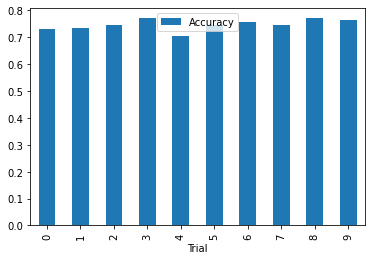

In [38]:
rdf = pd.DataFrame( {'Trial': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='Trial', y='Accuracy')
print('Average Accuracy: ', rdf['Accuracy'].mean())

This model passes cross validation

## Logistic Regression Models Summary
- Accuracy Score of Logistic Regression Model w/ Categorical Variables:   0.73
- Accuracy Score of Logistic Regression Model w/o Categorical Variables:  0.75
- Average Accuracy Score of Logistic Regression Models w/o Credit History: 0.74 (Supported by Cross Validation)
- Changes in accuracy score for NON-RANDOM models may be due to the high amount of neutral correlation variables skewed towards a large amount of rows where risk is good with less rows where risk is bad.

# Building a Random Forest Classifier

- Using the DataFrames we built and used previously for the logistic regression models (with categorical variable dummies), we will train the Random Forest Classifier, run it several times and estimate the range of accuracy of the model.
- We will train one Random Forest Classifier with the Credit History variable and one without the Credit History variable to determine whether Credit History is important in determining the risk of a person.

In [39]:
## Let's keep track of the accuracy scores of each model
accScores1 = []
## We're going to create and train 10 different Random Forest Classifiers
for i in range(10):
    ## Training variables with new model
    X_train, X_test, Y_train, Y_test = train_test_split(df_with_dummies, df['Risk'], test_size = 0.2, random_state = 0)
    ## Building Random Forest Model
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, Y_train)
    rfc_pred = rfc.predict(X_test)
    ## Print the model performance report
    print("Trial " + str(i+1))
    print(classification_report(Y_test, rfc_pred))
    print('Accuracy Score:', accuracy_score(Y_test, rfc_pred))
    ## Keep track of the accuracy score
    accScores1.append(accuracy_score(Y_test, rfc_pred))


Trial 1
              precision    recall  f1-score   support

           0       0.43      0.27      0.33        49
           1       0.79      0.89      0.83       151

    accuracy                           0.73       200
   macro avg       0.61      0.58      0.58       200
weighted avg       0.70      0.73      0.71       200

Accuracy Score: 0.735
Trial 2
              precision    recall  f1-score   support

           0       0.46      0.27      0.34        49
           1       0.79      0.90      0.84       151

    accuracy                           0.74       200
   macro avg       0.63      0.58      0.59       200
weighted avg       0.71      0.74      0.72       200

Accuracy Score: 0.745
Trial 3
              precision    recall  f1-score   support

           0       0.45      0.27      0.33        49
           1       0.79      0.89      0.84       151

    accuracy                           0.74       200
   macro avg       0.62      0.58      0.59       200
weight

0.746


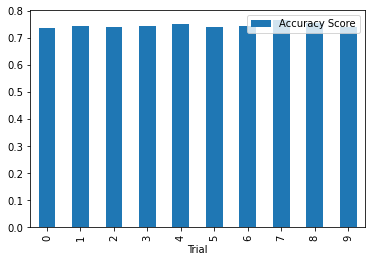

In [40]:
## Let's see how the models did
rdf = pd.DataFrame( {'Trial': range(10), 'Accuracy Score': accScores1})
rdf.plot.bar(x='Trial', y='Accuracy Score')
print('Average Accuracy: ', rdf['Accuracy Score'].mean())

In [41]:
## Just to make sure these variables are passing cross validation
result = cross_val_score(LogisticRegression(), X_train, Y_train, cv=10)
result

array([0.7375    , 0.7875    , 0.8125    , 0.725     , 0.7125    ,
       0.725     , 0.7125    , 0.725     , 0.70886076, 0.70886076])

I would say yes our model does pass cross validation because the values stay fairly close to each other

### Now let's try the same thing again but this time WITHOUT the Credit History variables

In [42]:
## Once again we'll keep track of the accuracy scores
accScores2 = []
## And we'll once again build 10 different Random Forest Classifiers
for i in range(10):
    ## Training variables with new model
    X_train, X_test, Y_train, Y_test = train_test_split(df_without_credit_history, df['Risk'], test_size = 0.2, random_state = 0)
    ## Building Random Forest Model
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, Y_train)
    rfc_pred = rfc.predict(X_test)
    ## Print the model performance report
    print("Trial " + str(i+1))
    print(classification_report(Y_test, rfc_pred))
    print('Accuracy Score:', accuracy_score(Y_test, rfc_pred))
    accScores2.append(accuracy_score(Y_test, rfc_pred))

Trial 1
              precision    recall  f1-score   support

           0       0.44      0.24      0.32        49
           1       0.79      0.90      0.84       151

    accuracy                           0.74       200
   macro avg       0.62      0.57      0.58       200
weighted avg       0.70      0.74      0.71       200

Accuracy Score: 0.74
Trial 2
              precision    recall  f1-score   support

           0       0.48      0.29      0.36        49
           1       0.80      0.90      0.84       151

    accuracy                           0.75       200
   macro avg       0.64      0.59      0.60       200
weighted avg       0.72      0.75      0.73       200

Accuracy Score: 0.75
Trial 3
              precision    recall  f1-score   support

           0       0.53      0.35      0.42        49
           1       0.81      0.90      0.85       151

    accuracy                           0.77       200
   macro avg       0.67      0.62      0.64       200
weighted

0.746


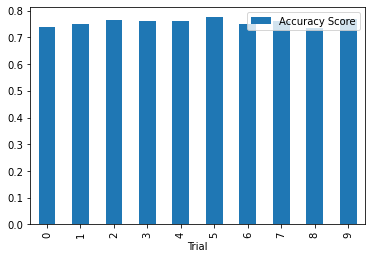

In [43]:
## Let's see how they performed
rdf2 = pd.DataFrame( {'Trial': range(10), 'Accuracy Score': accScores2})
rdf2.plot.bar(x='Trial', y='Accuracy Score')
print('Average Accuracy: ', rdf['Accuracy Score'].mean())

In [44]:
## And once more just to make sure these variables are passing cross validation
result = cross_val_score(LogisticRegression(), X_train, Y_train, cv=10)
result

array([0.7125    , 0.75      , 0.7875    , 0.7125    , 0.7125    ,
       0.75      , 0.7375    , 0.725     , 0.70886076, 0.73417722])

And again I believe this model passes cross validation with the given range of values.

## Summary for Random Forest Classifier
- The Random Forest Classifier seems to perform similarly to the Logistic Regression models, with the lowest observed Accuracy score being 0.72 and the highest observed Accuracy score being 0.78
- The average accuracy score for Random Forest Classifiers usually sits between 0.74 and 0.75

## Does Credit History matter?
- No... thank you for listening to my ted talk. (I'm just kidding please don't take points off)
- But seriously Credit History does not seem to have an impact on the accuracy of the model. Seems kind of ironic but the numbers do not lie.
#### In conclusion: Credit history is not important in classifying if the loan is bad or good risk. Comparing both the Logistic Model with and without credit history and the Random Forest Classifier model with and without Credit History made no notable impact in the accuracy score of the models.

#### My best model that does not include Credit History would be the Random Forest Classifier with the average performance usually above 0.74